In [1]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

# Phân loại với SVM tuyến tính

In [2]:
iris_data = load_iris()

In [3]:
X = iris_data['data'][:,2:]
y = iris_data['target']

setosa_or_versi = (y == 1) | (y == 0)

X = X[setosa_or_versi]
y = y[setosa_or_versi]

In [4]:
x0 = np.linspace(0,6,300)
pred_1 = 5*x0 - 20
pred_2 = x0- 1.8
pred_3 = 0.1*x0 + 0.5

In [5]:
svm = SVC(kernel = 'linear',C=float("inf"))
svm.fit(X,y)

SVC(C=inf, kernel='linear')

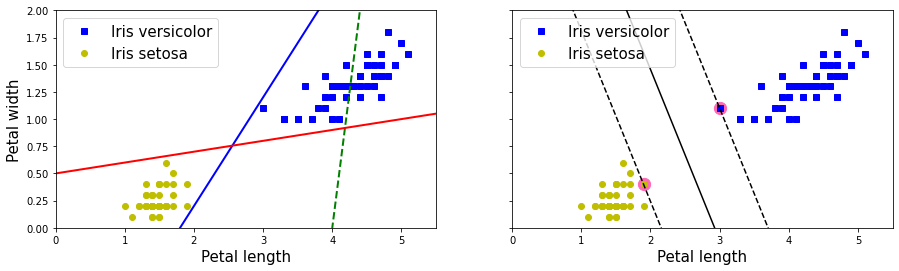

In [6]:
def plot_svm_boundary(svm,xmin = 0,xmax = 6):
    w = svm.coef_[0]
    b = svm.intercept_[0]

    x0 = np.linspace(xmin,xmax,300)
    # w[0] : x
    # w0x0 + w1x1 + b = 0 => x1 = -w0/w1 * x0 - b/w1
    boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = boundary + margin
    gutter_down = boundary - margin

    svt = svm.support_vectors_
    plt.scatter(x = svt[:,0],y = svt[:,1],s = 150,color = 'hotpink')
    plt.plot(x0,boundary,'k-')
    plt.plot(x0,gutter_up,'k--')
    plt.plot(x0,gutter_down,'k--')

fig, axes = plt.subplots(ncols = 2,figsize = (15,4),sharey= True)

plt.sca(axes[0])
plt.plot(X[:,0][y==1], X[:,1][y==1],'bs',label = 'Iris versicolor')
plt.axis([0, 5.5, 0, 2])
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',label = 'Iris setosa')
plt.legend(loc = 'upper left',fontsize = 15)
plt.xlabel("Petal length",fontsize = 15)
plt.ylabel("Petal width",fontsize = 15)
plt.plot(x0,pred_1,'g--',linewidth = 2)
plt.plot(x0,pred_2,'b-',linewidth = 2)
plt.plot(x0,pred_3,'r-',linewidth = 2)

plt.sca(axes[1])
plt.plot(X[:,0][y==1], X[:,1][y==1],'bs',label = 'Iris versicolor')
plt.axis([0, 5.5, 0, 2])
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',label = 'Iris setosa')
plt.legend(loc = 'upper left',fontsize = 15)
plt.xlabel("Petal length",fontsize = 15)
plot_svm_boundary(svm)



## Độ nhạy với khoảng giá trị của đặc trưng

In [7]:
Xs = np.array([[3,75],[5,60],[1,50],[5,20]])
ys = np.array([1,1,0,0])

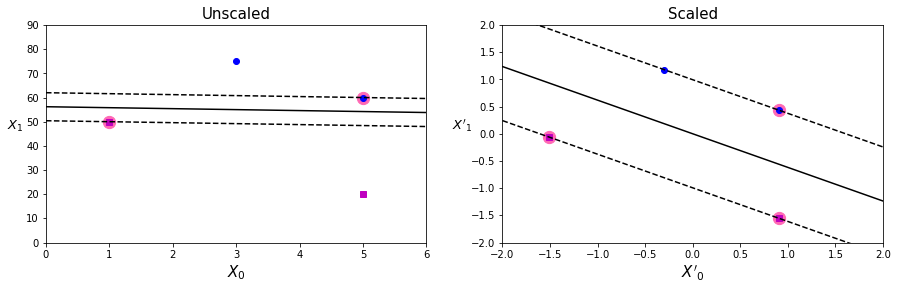

In [8]:
svm_clf = SVC(kernel = 'linear',C=100)
svm_clf.fit(Xs,ys)

fig, axes = plt.subplots(ncols = 2,figsize = (15,4))
plt.sca(axes[0])
plt.title("Unscaled",fontsize = 15)
plt.xlabel("$X_0$",fontsize = 15)
plt.ylabel("$X_1$\t ",fontsize = 13,rotation = 0)
plt.plot(Xs[:,0][ys == 1],Xs[:,1][ys == 1], 'bo')
plt.plot(Xs[:,0][ys == 0],Xs[:,1][ys == 0], 'ms')
plt.axis([0, 6, 0, 90])
plot_svm_boundary(svm_clf)

plt.sca(axes[1])
std_scale = StandardScaler()
x_scale = std_scale.fit_transform(Xs)
svm_clf.fit(x_scale,ys)
plt.title("Scaled",fontsize = 15)
plt.xlabel("$X'_0$",fontsize = 15)
plt.ylabel("$X'_1$\t ",fontsize = 13,rotation = 0)
plt.plot(x_scale[:,0][ys == 1],x_scale[:,1][ys == 1], 'bo')
plt.plot(x_scale[:,0][ys == 0],x_scale[:,1][ys == 0], 'ms')
plt.axis([-2, 2, -2, 2])
plot_svm_boundary(svm_clf,-2,2)

`Các mô hình SVM khá nhạy cảm với khoảng giá trị của đặc trưng`

## Phân loại biên mềm

Nếu ta bắt buộc các mẫu phải nằm ngoài con đường và ở đúng phía thì thuật toán này được gọi là phân loại biên cứng:
* Chỉ hoạt động khi dữ liệu có tính tách biệt tuyến tính
* Nhạy cảm với các điểm ngoại lai

In [9]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

(0.5, 5.0, 0.0, 2.0)

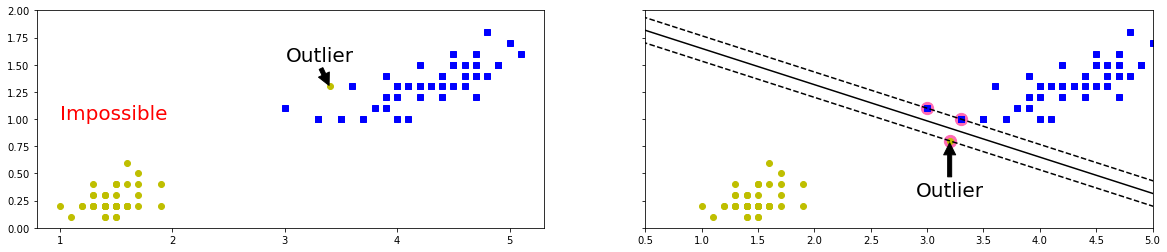

In [10]:
fig,axes = plt.subplots(ncols = 2,sharey=True,figsize = (20,4))

plt.sca(axes[0])
x_new = np.r_[X,[X_outliers[0]]]
y_new = np.r_[y,[y_outliers[0]]]
plt.plot(x_new[:,0][y_new == 0],x_new[:,1][y_new == 0],'yo')
plt.plot(x_new[:,0][y_new == 1],x_new[:,1][y_new == 1],'bs')
plt.annotate("Outlier",xy = X_outliers[0], xycoords = "data",
            arrowprops=dict(facecolor='black', shrink=0.05),textcoords='offset points',xytext=(-10,40),
            horizontalalignment='center', verticalalignment='top',ha = 'center',fontsize = 20)
plt.text(1,1,"Impossible",fontsize = 20,color = 'red')

plt.sca(axes[1])
x_new = np.r_[X,[X_outliers[1]]]
y_new = np.r_[y,[y_outliers[1]]]
plt.plot(x_new[:,0][y_new == 0],x_new[:,1][y_new == 0],'yo')
plt.plot(x_new[:,0][y_new == 1],x_new[:,1][y_new == 1],'bs')
plt.annotate("Outlier",xy = X_outliers[1], xycoords = "data",
            arrowprops=dict(facecolor='black', shrink=0.05),textcoords='offset points',xytext=(0,-40),
            horizontalalignment='center', verticalalignment='top',ha = 'center',fontsize = 20)
svm_clf = SVC(kernel = "linear",C=10**9)
svm_clf.fit(x_new,y_new)
plot_svm_boundary(svm_clf,0,6)
plt.axis([0.5,5,0,2])

Để tránh vấn đề trên, ta sẽ sử dụng một mô hình linh hoạt hơn. Mục tiêu là tìm ra sự cân bằng giữa độ rộng của con đường càng lớn càng tốt nhưng đồng thời hạn chế `vi phạm biên`. Thuật toán này được gọi là phân loại biên mềm

In [11]:
X = iris_data["data"][:,2:]  # petal length, petal width
y = iris_data["target"] == 2  # Iris virginica


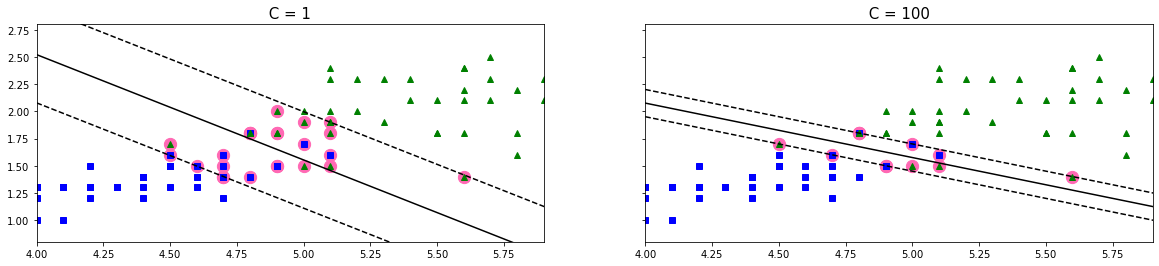

In [12]:
fig,axes = plt.subplots(ncols = 2,sharey = True,figsize = (20,4))

svc = SVC(kernel = 'linear',C=1)
svc.fit(X,y)
plt.sca(axes[0])
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.axis([4, 5.9, 0.8, 2.8])
plt.title(" C = 1 ", fontsize = 15)
plot_svm_boundary(svc,4,6)

svc = SVC(kernel = 'linear',C=100)
svc.fit(X,y)
plt.sca(axes[1])
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.title(" C = 100 ", fontsize = 15)
plt.axis([4, 5.9, 0.8, 2.8])
plot_svm_boundary(svc,4,6)

# Phân loại SVM phi tuyến 

* Mặc dù nhiều bộ phân loại SVM tuyến tính có hiệu năng cao và hoạt động tốt trong nhiều trường hợp nhưng rất nhiều tập dữ liệu lại không có tính `tách biệt tuyến tính`
* Một hướng tiếp cận để xử lí các tập dữ liệu phi tuyến là sử dụng thêm đặc trưng, ví dụ như các đặc trưng đa thức.

In [13]:
x1 = np.linspace(-4,4,9).reshape(-1,1)
y = np.array([1,1,0,0,0,0,0,1,1])
x1_p = np.c_[x1,x1**2]

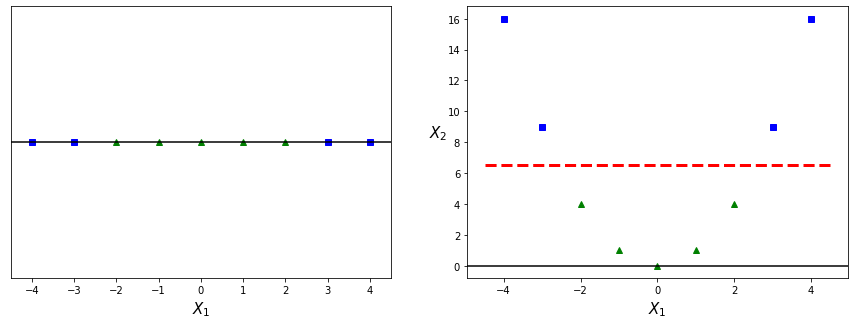

In [14]:
fig,axes = plt.subplots(ncols = 2,figsize = (15,5))

plt.sca(axes[0])
plt.plot(x1[:][y==1],np.zeros(4),'bs')
plt.plot(x1[:][y==0],np.zeros(5),'g^')
plt.axhline(y=0,color = 'k')
plt.axis([-4.5, 4.5, -0.2, 0.2])
ax = plt.gca() #get current axis
ax.get_yaxis().set_visible(False)
plt.xlabel("$X_1$",fontsize = 15)

plt.sca(axes[1])
plt.plot(x1_p[:,0][y==1],x1_p[:,1][y==1],'bs')
plt.plot(x1_p[:,0][y==0],x1_p[:,1][y==0],'g^')
plt.axhline(y=0,color = 'k')
plt.xlabel("$X_1$",fontsize = 15)
plt.ylabel("$X_2$   ",fontsize = 15,rotation = 0)
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)


In [15]:
from sklearn.datasets import make_moons
x,y = make_moons(n_samples=100,noise = 0.15,random_state=42)

In [16]:
svm_clf = Pipeline([
    ("poly",PolynomialFeatures(degree = 3)),
    ("scale",StandardScaler()),
    ("svm_clf",LinearSVC(loss = 'hinge', C = 10))
])
svm_clf.fit(x,y)

C:\Users\quypr\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scale', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [17]:
def plot_contour(svm,axis):
    x1s = np.linspace(axis[0],axis[1],100)
    x2s = np.linspace(axis[2],axis[3],100)
    x1,x2 = np.meshgrid(x1s,x2s) # 
    X = np.c_[x1.ravel(),x2.ravel()]
    y_pred = svm.predict(X).reshape(x1.shape)
    y_decision = svm.decision_function(X).reshape(x1.shape)
    plt.contourf(x1,x2,y_pred,cmap=plt.cm.brg,alpha = 0.2)
    plt.contourf(x1,x2,y_decision,cmap=plt.cm.brg, alpha = 0.1)


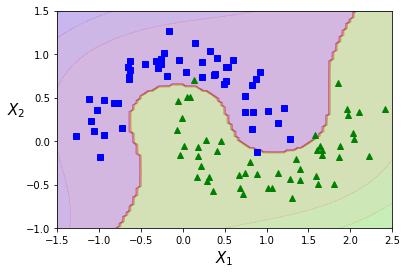

In [18]:
plt.plot(x[:,0][y==0],x[:,1][y==0],'bs')
plt.plot(x[:,0][y==1],x[:,1][y==1],'g^')
plt.xlabel("$X_1$",fontsize = 15)
plt.ylabel("$X_2$   ",fontsize = 15,rotation = 0)
plt.axis([-1.5,2.5,-1,1.5])
plot_contour(svm_clf,[-1.5,2.5,-1,1.5])

## Hạt nhân đa thức

Khi dùng mô hình SVM ta có thể áp dụng `kernel trick` giúp ta đạt kết quả tương tự như khi thêm một số lượng lớn đặc trưng đa thức nhưng lại không thực sự thêm bất kì đặc trưng nào => không có sự bùng nổ tổ hợp các đặc trưng 

In [19]:
poly_kernel_svm_clf_1 = Pipeline([
    ("scaler",StandardScaler()),
    ("svm",SVC(kernel = "poly",degree = 3,coef0 = 1,C = 5))
])
poly_kernel_svm_clf_1.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=5, coef0=1, kernel='poly'))])

In [20]:
poly_kernel_svm_clf_2 = Pipeline([
    ("scaler",StandardScaler()),
    ("svm",SVC(kernel = "poly",degree = 10,coef0 = 100,C = 5))
])
poly_kernel_svm_clf_2.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Siêu tham số `coef0` kiểm soát mức độ mà mô hình bị ảnh hưởng bởi đa thức bậc cao và đa thức bậc thấp 

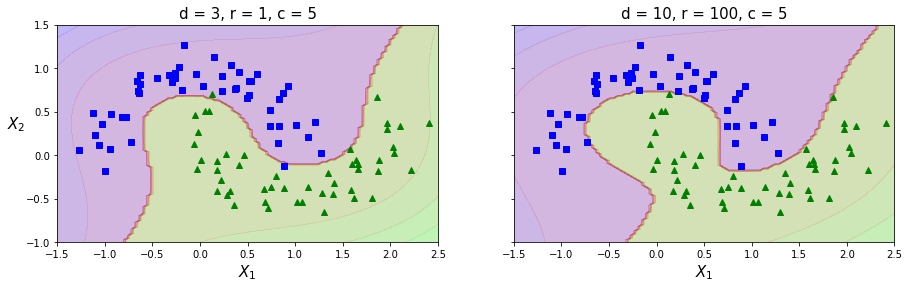

In [21]:
fig,axes = plt.subplots(ncols = 2, figsize = (15,4), sharey = True)
plt.sca(axes[0])
plt.plot(x[:,0][y==0],x[:,1][y==0],'bs')
plt.plot(x[:,0][y==1],x[:,1][y==1],'g^')
plt.xlabel("$X_1$",fontsize = 15)
plt.ylabel("$X_2$   ",fontsize = 15,rotation = 0)
plt.axis([-1.5,2.5,-1,1.5])
plt.title("d = 3, r = 1, c = 5",fontsize = 15)
plot_contour(poly_kernel_svm_clf_1,[-1.5,2.5,-1,1.5])

plt.sca(axes[1])
plt.plot(x[:,0][y==0],x[:,1][y==0],'bs')
plt.plot(x[:,0][y==1],x[:,1][y==1],'g^')
plt.xlabel("$X_1$",fontsize = 15)
plt.title("d = 10, r = 100, c = 5",fontsize = 15)
plt.axis([-1.5,2.5,-1,1.5])
plot_contour(poly_kernel_svm_clf_2,[-1.5,2.5,-1,1.5])

## Đặc trưng tương tự

Một kỹ thuật khác để giải quyết các bài toán phi tuyến là thêm vào các đặc trưng được tính bằng một hàm tương tự (similarity function). Hàm này đo lường mức độ giống nhau của mỗi mẫu với một mốc (landmark) cụ thể.

$$\phi_{\gamma} (x,l) = exp(-\gamma||x - l ||)^2)$$ 
<center> Hàm tương tự


In [22]:
def gauss(x,landmark,gamma):
    return np.exp(-gamma*(np.linalg.norm(x-landmark,axis=1)**2))

In [23]:
x1 = np.linspace(-4,4,9).reshape(-1,1)
y1 = np.array([1,1,0,0,0,0,0,1,1])

In [24]:
x1s = np.linspace(-4.5,4.5,200).reshape(-1,1)
x2s = gauss(x1s,-2,0.3)
x3s = gauss(x1s,1,0.3)


In [25]:
X = np.c_[gauss(x1,-2,0.3),gauss(x1,1,0.3)]

(-0.1, 1.1, -0.1, 1.1)

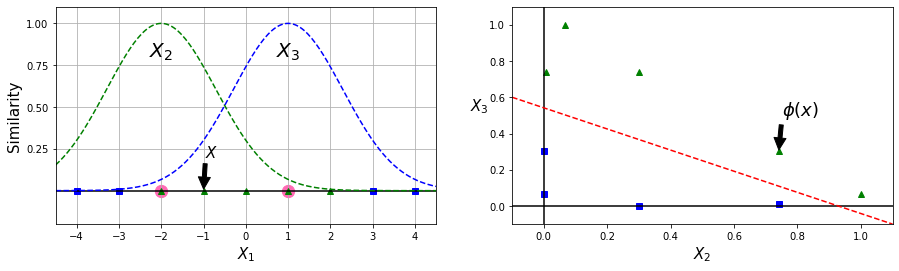

In [26]:
fig,axes = plt.subplots(ncols = 2,figsize = (15,4))

plt.sca(axes[0])
plt.plot(x1[:][y1==1],np.zeros(4),'bs')
plt.plot(x1[:][y1==0],np.zeros(5),'g^')
plt.axhline(y=0,color = 'k')
plt.axis([-4.5, 4.5, -0.2, 1.1])
plt.xlabel("$X_1$",fontsize = 15)
plt.ylabel("Similarity",fontsize = 15)
plt.grid(1)
plt.scatter([-2,1],[0,0],s = 150, color = 'hotpink')
plt.annotate("$X$",xy = [-1,0],xytext =(-0.8,0.2),
            arrowprops = dict(facecolor = 'black', shrink = 0.05),
            ha="center", fontsize = 15
            )
plt.plot(x1s,x2s,'g--')
plt.plot(x1s,x3s,'b--')
plt.text(-2,0.8,"$X_2$",ha = 'center',fontsize = 20)
plt.text(1,0.8,"$X_3$",ha = 'center',fontsize = 20)
plt.gca().get_yaxis().set_ticks([0.25,0.5,0.75,1])

plt.sca(axes[1])
plt.plot(X[:,0][y1==0],X[:,1][y1==0],'g^')
plt.plot(X[:,0][y1==1],X[:,1][y1==1],'bs')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.annotate("$\phi(x)$",xy = (X[3,0],X[3,1]),xytext = (0.75,0.5),arrowprops = dict(facecolor = 'black', shrink = 0.05),fontsize = 18)
plt.xlabel("$X_2$",fontsize = 15)
plt.ylabel("$X_3$   ",fontsize = 15,rotation = 0)
plt.plot([-0.1,1.1],[0.6,-0.1],'r--')
plt.axis([-0.1, 1.1, -0.1, 1.1])


Cách chọn mốc phù hợp:
* Hướng tiếp cận đơn giản nhất là tạo một mốc tại mỗi vị trí của tất cả các mẫu trong tập huấn luyện
    * Phương pháp này tạo ra nhiều chiều dữ liệu mới, từ đó tăng khả năng tập dữ liệu được biến đổi sẽ tách biệt tuyến tính
    * Nhược điểm: một tập dữ liệu `m` mẫu và `n` đặc trưng sẽ được biến đổi thành tập dữ liệu `m` mẫu và `m` đặc trưng (giả sử ta lược bỏ các đặc trưng gốc)

## Hạt nhân Gaussian RBF

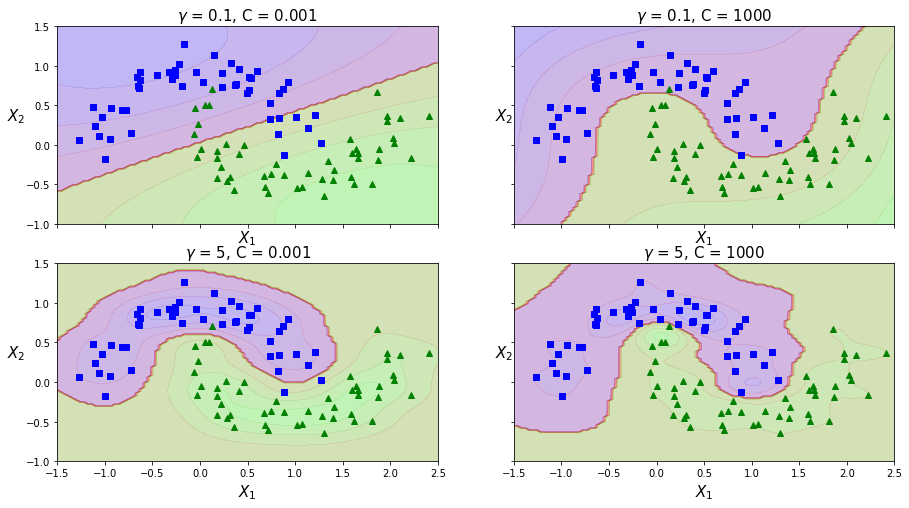

In [27]:
gamma1, gamma2 = 0.1,5
C1, C2 = 0.001, 1000
hyper_para = [(gamma1,C1), (gamma1,C2), (gamma2,C1), (gamma2,C2)]


fig, axes = plt.subplots(nrows = 2, ncols = 2,figsize = (15,8),sharex = True,sharey= True)

for i,para in enumerate(hyper_para):
    rbf_kernel_svm = Pipeline([
        ("scaler",StandardScaler()),
        ("svm",SVC(kernel = 'rbf', gamma = para[0], C = para[1]))
    ])
    rbf_kernel_svm.fit(x,y)
    plt.sca(axes[i//2,i%2])
    plt.plot(x[:,0][y==0],x[:,1][y==0],'bs')
    plt.plot(x[:,0][y==1],x[:,1][y==1],'g^')
    plt.title("$\gamma$ = {}, C = {}".format(para[0],para[1]),fontsize = 15)
    plt.xlabel("$X_1$",fontsize = 15)
    plt.ylabel("$X_2$   ",rotation = 0,fontsize = 15)
    plot_contour(rbf_kernel_svm,[-1.5,2.5,-1,1.5])

# Hồi quy SVM

In [28]:
from sklearn.svm import LinearSVR

In [29]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [30]:
svm_reg1 = LinearSVR(epsilon=1.5,random_state=42)
svm_reg1.fit(X,y)

LinearSVR(epsilon=1.5, random_state=42)

In [31]:
svm_reg2 = LinearSVR(epsilon=0.5,random_state=42)
svm_reg2.fit(X,y)

LinearSVR(epsilon=0.5, random_state=42)

In [32]:
def find_support_vector(svm,X,y):
    y_pred = svm.predict(X)
    margin = (abs(y - y_pred) > svm.epsilon)
    return np.argwhere(margin)

In [33]:
def plot_svm_regression(svm,X,y,axes):
    x1s = np.linspace(axes[0],axes[1],100).reshape(-1,1)
    y1s = svm.predict(x1s)
    plt.plot(x1s,y1s,'k-',label = r"$\hat{y}$")
    plt.legend(loc="upper left", fontsize=15)
    plt.plot(x1s,y1s + svm.epsilon,'k--')
    plt.plot(x1s,y1s - svm.epsilon,'k--')
    plt.scatter(X[find_support_vector(svm,X,y)],y[find_support_vector(svm,X,y)],facecolors = "#ffc0cb",s = 200)
    plt.xlabel("$X_1$",fontsize = 18)
    

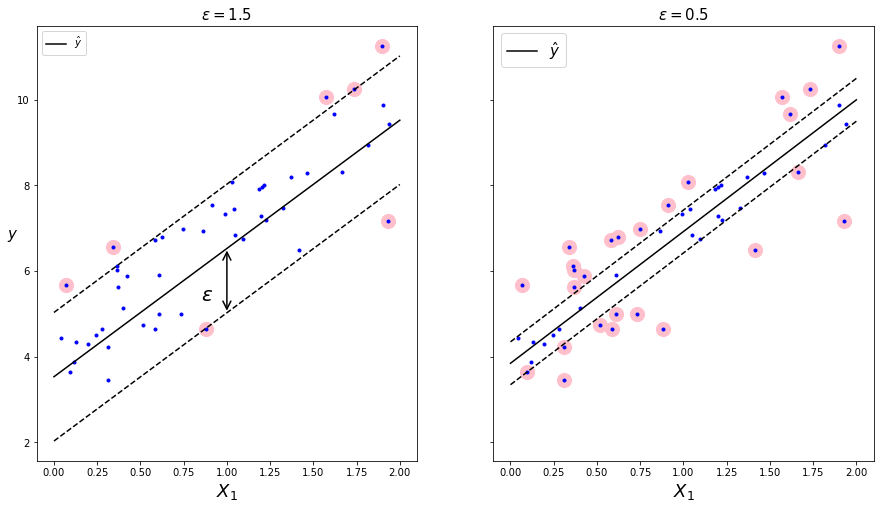

In [34]:
fig,axes = plt.subplots(nrows = 1,ncols= 2,sharey= True, figsize = (15,8))
plt.sca(axes[0])
plt.plot(X,y,'b.',linewidth = 3)
plot_svm_regression(svm_reg1,X,y,[0,2,3,12])
plt.title("$\epsilon = {}$".format(svm_reg1.epsilon),fontsize = 15)
plt.annotate(
    "",
    xy = [1,svm_reg1.predict([[1]])],
    xytext = [1,svm_reg1.predict([[1]]) - svm_reg1.epsilon],
    fontsize = 20,
    arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
)
plt.text(0.85,5.3,"$\epsilon$",fontsize = 20)
plt.legend(loc = "upper left")
plt.ylabel("$y$",rotation = 0, fontsize = 15)
plt.sca(axes[1])
plt.title("$\epsilon = {}$".format(svm_reg2.epsilon),fontsize = 15)
plt.plot(X,y,'b.',linewidth = 3)
plot_svm_regression(svm_reg2,X,y,[0,2,3,12])


In [35]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [36]:
from sklearn.svm import SVR
svr1 = SVR(kernel = "poly",degree = 2, C = 100,epsilon=0.1)
svr2 = SVR(kernel = "poly",degree = 2, C = 0.01,epsilon=0.1)
svr1.fit(X,y)
svr2.fit(X,y)

SVR(C=0.01, degree=2, kernel='poly')

Text(0.5, 0, '$X_1$')

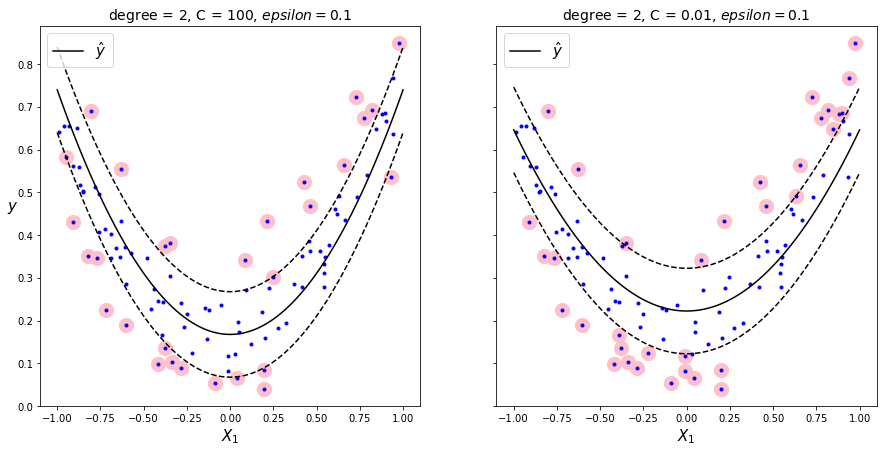

In [37]:
fig,axes = plt.subplots(ncols = 2,figsize = (15,7),sharey=True)
plt.sca(axes[0])
plt.plot(X,y,'b.')
plot_svm_regression(svr1,X,y,[-1,1,0,1])
plt.title("degree = {}, C = {}, $epsilon = {}$".format(svr1.degree,svr1.C,svr1.epsilon),fontsize = 14)
plt.xlabel("$X_1$",fontsize = 15)
plt.ylabel("$y$",fontsize = 15,rotation = 0 )

plt.sca(axes[1])
plt.plot(X,y,'b.')
plot_svm_regression(svr2,X,y,[-1,1,0,1])
plt.title("degree = {}, C = {}, $epsilon = {}$".format(svr2.degree,svr2.C,svr2.epsilon),fontsize = 14)
plt.xlabel("$X_1$",fontsize = 15)


# Giải thích mô hình

## Hàm quyết định và dự đoán 

Mô hình phân loại SVM dự đoán lớp của một mẫu X mới bằng cách tính hàm quyết định: $w^Tx + b = w_1x_1 + ... w_nx_n + b$ 

$$\hat{y} = \left\{\begin{array}{rcl} 0 & \hbox{if} & \hbox{$w^Tx + b < 0$} \\ 1 & \hbox{if} & \hbox{$w^Tx+b \geq 0$} \end{array} \right. $$

## Hàm mục tiêu

Ta thấy độ dốc hàm quyết định bằng chuẩn vector trọng số: $\mathbf{||w||}$


Nếu giảm 1 nửa độ dốc, khoảng cách từ các điểm mà tại đó hàm quyết định có giá trị bằng +-1 tới ranh giới quyết định sẽ tăng lên 2 lần. Nói cách khác, việc chia độ dốc cho 2 sẽ khiến độ rộng biên tăng lên gấp đôi

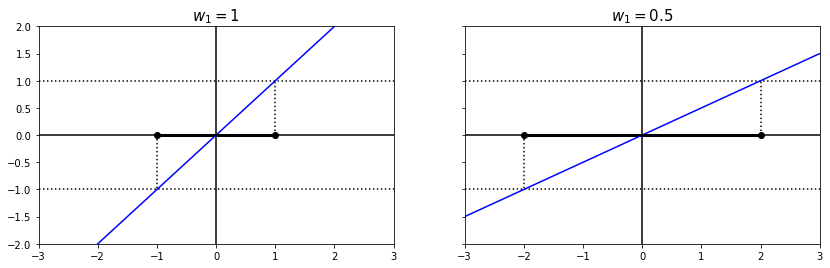

In [40]:
def plot_2D_vector(w,b,axes,xlim = [-3,3]):
    plt.sca(axes)
    x = np.linspace(xlim[0],xlim[1],200)
    y = x*w + b
    m = 1/w
    plt.plot(xlim,[1,1],'k:')
    plt.plot(xlim,[-1,-1],'k:')
    plt.plot([-m,-m],[0,-1],'k:')
    plt.plot([m,m],[0,1],'k:')
    plt.plot([-m,m],[0,0],'k-o',linewidth = 3)
    plt.title("$w_1 = {}$".format(w),fontsize = 15)
    
    plt.plot(x,y,'b-')
    plt.axis([xlim[0],xlim[1],-2,2])
    plt.axhline(y = 0,color = 'k')
    plt.axvline(x = 0,color = 'k')
    plt.plot([-1,1],[0,0],'k-')
fig,axes = plt.subplots(ncols = 2,sharey = True,figsize = (14,4))
plot_2D_vector(1,0,axes[0])
plot_2D_vector(1/2,0,axes[1])


Vì vậy ta muốn cực tiểu hóa $||w||$ để tìm được biên có độ rộng lớn. Nếu muốn tránh hoàn toàn vi phạm biên (biên cứng), hàm quyết định cần có giá trị lớn hơn 1 với tất cả mẫu huấn luyện dương và giá trị nhỏ hơn -1 với các mẫu huấn luyện âm.

Nếu ta định nghĩa $t^{(i)}$ = -1 cho các mẫu âm (nếu $y^{(i)}$ = 0) và $t^{(i)}$ = 1 cho các mẫu dương (nếu $y^{(i)}$ = 1) thì khi đó điều kiện ràng buộc được biểu diễn là $t^{(i)}(w^Tx^{(i)} + b) \geqslant 1$ cho tất cả các mẫu

Vậy ta có hàm mục tiêu
$$ minimize \frac{1}{2}w^Tw$$
sao cho $$t^{(i)}(w^Tx^{(i)} + b) \geqslant 1 \forall i = (1,2,...m)$$ 

`Note:` Ta đang cực tiểu hóa hàm $\frac{1}{2}w^Tw$ tức là $\frac{1}{2}||w||^2$ thay vì cực tiểu hóa ||w||. Lí do là vì $||w||^2$ có đạo hàm đẹp và đơn giản đó là ||w||, trong khi ||w|| không khả vi tại w = 0

Để thu được hàm mục tiêu cho biên mềm, ta cần thêm `biến bù (slack variable)` $\zeta^{(i)} \geq 0 $ cho mỗi mẫu: $\zeta^{(i)}$ đo lường mức độ vi phạm cho phép của mẫu thứ i

Giờ ta có 2 hàm mục tiêu mâu thuẫn nhau:
* Một hàm khiến biến bù càng nhỏ càng tốt để hạn chế vi phạm biên   
* Một hàm khiến  $\frac{1}{2}w^Tw$ càng nhỏ càng tốt để tăng độ rộng biên.


=> Cần dùng siêu tham số `C` để điều chỉnh sự cân bằng 2 hàm này

$$ minimize \frac{1}{2}w^Tw + C\sum^{m}_{i=1}\zeta^{(i)}$$
sao cho $$t^{(i)}(w^Tx^{(i)} + b) \geqslant 1 - \zeta^{(i)} \hbox{ và } \zeta^{(i)} \geqslant 0 \forall i = (1,2,...m)$$ 